In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sn;
pd.set_option("display.max_columns", 101)
import pdb
import time
import pickle
import json
import importlib
from ast import literal_eval
import os
import process_data as p_d
import make_figures as mf
import run_statistics as rs
from collections import defaultdict
import warnings

/Users/paulkrueger/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [455]:
df = pd.read_pickle('data/human/1.0/trials.pkl')

import statsmodels.formula.api as smf

df['payoff_relative'] = df['payoff_gross'] / df['payoff_perfect']
for p in ['nr_clicks']:#,'payoff_relative','processing_pattern','click_var_gamble','click_var_outcome']:
    print('=========================')
    for c in ['alpha']:#['sigma','alpha','cost']:
        print('*********************')
        print(p,c)

        # normalize for standardized regression coefficients
        df_z = df.dropna(subset=[p]); df_z[p] = (df_z[p] - df_z[p].mean())/df_z[p].std(ddof=0)
        
        res = smf.mixedlm(p+'~'+c, df_z, groups=df_z["pid"]).fit()
        
        print('betas: ',res.params)
        print('p-values: ',res.pvalues)
        print(res.summary())

*********************
nr_clicks alpha
betas:  Intercept   -0.023337
alpha        0.008050
Group Var    4.293411
dtype: float64
p-values:  Intercept     3.240250e-01
alpha         1.102559e-01
Group Var    7.385380e-241
dtype: float64
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: nr_clicks  
No. Observations: 47360   Method:             REML       
No. Groups:       2368    Scale:              0.1889     
Min. group size:  20      Likelihood:         -33024.9123
Max. group size:  20      Converged:          Yes        
Mean group size:  20.0                                   
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept  -0.023     0.024  -0.986  0.324  -0.070   0.023
alpha       0.008     0.005   1.597  0.110  -0.002   0.018
Group Var   0.811     0.056                               



In [157]:
import statsmodels.formula.api as smf

in_dir_human = 'data/human/2.3/'
df_con = pd.read_pickle(in_dir_human+'trials.pkl')
df_exp = pd.read_pickle(in_dir_human+'trials_EVminTime.pkl')
df = pd.concat([df_con, df_exp],ignore_index=True)
df['payoff_relative'] = df['payoff_gross'] / df['payoff_perfect']
# df = df.groupby('pid').mean()

for p in ['nr_clicks']:#,'payoff_relative','processing_pattern','click_var_gamble','click_var_outcome']:
    print('===============================')
#     df_con['alpha'] = df_con.alpha.astype(int)
#     df_exp['alpha'] = df_exp.alpha.astype(int)
    
    # normalize for standardized regression coefficients
    df_z = df.dropna(subset=[p]); df_z[p] = (df_z[p] - df_z[p].mean())/df_z[p].std(ddof=0)
    df_con_z = df_z[df_z.display_ev==False]
    df_exp_z = df_z[df_z.display_ev==True]
    
#     for c in ['alpha','cost']:
#         print('**********',p,c,'***********')
        
#         res = smf.mixedlm(p+'~'+c+'*C(display_ev)', df_z, groups=df_z["pid"]).fit()
        
#         print('betas: ',res.params)
#         print('p-values: ',res.pvalues)
#         print(res.summary())
    
#     res = smf.mixedlm(p+'~alpha*cost', data=df_z, groups='display_ev').fit()

    # categorical or not; z-score or not; interaction term or not; use z results to test for significance between groups
#     res_con = smf.mixedlm(p+'~C(alpha)*C(cost)', data=df_con_z, groups='pid').fit()
#     res_exp = smf.mixedlm(p+'~C(alpha)*C(cost)', data=df_exp_z, groups='pid').fit()
    res_con = smf.mixedlm(p+'~alpha*cost', data=df_con, groups='pid').fit()
    res_exp = smf.mixedlm(p+'~alpha*cost', data=df_exp, groups='pid').fit()
#     res_con = smf.mixedlm(p+'~alpha*cost', data=df_con, groups='pid').fit()
#     res_exp = smf.mixedlm(p+'~alpha*cost', data=df_exp, groups='pid').fit()
    print(res_con.summary())
    print(res_exp.summary())
#     vc = {'pid':'0+pid'}#,'alpha':'0+alpha','cost':'0+cost'}
#     res = smf.mixedlm(p+'~alpha*cost', data=df, groups='display_ev', vc_formula=vc, re_formula="1").fit()
#     re_formula="~Time" # random slopes for groups wrt to Time
#     res = smf.mixedlm(p+'~alpha*cost', data=df_z, groups='pid', vc_formula={"display_ev": "0 + C(display_ev)"}).fit()
#     res = smf.mixedlm(p+'~C(alpha)+C(cost)', df_exp, groups='pid').fit()
# re_formula="1", groups="group1", vc_formula={"group2": "0 + C(group2)", "group3": "0 + C(group3)"}

#     print('betas: ',res.params)
#     print('p-values: ',res.pvalues)
#     print(res.summary())
#     table = sm.stats.anova_lm(res, typ=2) # Type 2 Anova DataFrame
#     print(table)
    
#     res = smf.mixedlm(p+'~alpha+cost+C(display_ev):pid', df_z, groups=df_z["pid"]).fit()
#     print(res.summary())
#     table = sm.stats.anova_lm(res, typ=2) # Type 2 Anova DataFrame
#     print(table)



/Users/paulkrueger/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: nr_clicks 
No. Observations: 4120    Method:             REML      
No. Groups:       206     Scale:              4.8515    
Min. group size:  20      Likelihood:         -9483.4466
Max. group size:  20      Converged:          Yes       
Mean group size:  20.0                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      5.383    0.671  8.020 0.000  4.068  6.699
alpha         -0.034    0.297 -0.114 0.909 -0.616  0.548
cost          -0.429    0.233 -1.839 0.066 -0.886  0.028
alpha:cost    -0.110    0.103 -1.070 0.285 -0.312  0.091
pid Var        9.671    0.459                           

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: nr_clicks  
No. Observations: 3960    Method:             RE

In [345]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore = sm.datasets.get_rdataset("Moore", "carData", cache=True) # load
data = moore.data
data = data.rename(columns={"partner.status": "partner_status"}) # make name pythonic
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',data=data).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
print(table)

                                              sum_sq    df          F  \
C(fcategory, Sum)                          11.614700   2.0   0.276958   
C(partner_status, Sum)                    212.213778   1.0  10.120692   
C(fcategory, Sum):C(partner_status, Sum)  175.488928   2.0   4.184623   
Residual                                  817.763961  39.0        NaN   

                                            PR(>F)  
C(fcategory, Sum)                         0.759564  
C(partner_status, Sum)                    0.002874  
C(fcategory, Sum):C(partner_status, Sum)  0.022572  
Residual                                       NaN  


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_pickle('data/human/1.0/trials.pkl')

# moore = sm.datasets.get_rdataset("Moore", "carData", cache=True) # load
# data = moore.data
# data = data.rename(columns={"partner.status": "partner_status"}) # make name pythonic
# moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',data=data).fit()
# table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
# print(table)
moore = sm.datasets.get_rdataset("Moore", "carData", cache=True) # load
data = moore.data
data = data.rename(columns={"partner.status": "partner_status"}) # make name pythonic
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',data=data).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
print(table)


import statsmodels.formula.api as smf

df['payoff_relative'] = df['payoff_gross'] / df['payoff_perfect']
for p in ['nr_clicks','payoff_relative','processing_pattern','click_var_gamble','click_var_outcome']:
    print('=========================')
    for c in ['sigma','alpha','cost']:
        print('*********************')
        print(p,c)

        # normalize for standardized regression coefficients
        df_z = df.dropna(subset=[p]); df_z[p] = (df_z[p] - df_z[p].mean())/df_z[p].std(ddof=0)
        
        res = smf.mixedlm(p+'~'+c, df_z, groups=df_z["pid"]).fit()
        
        print('betas: ',res.params)
        print('p-values: ',res.pvalues)
        print(res.summary())


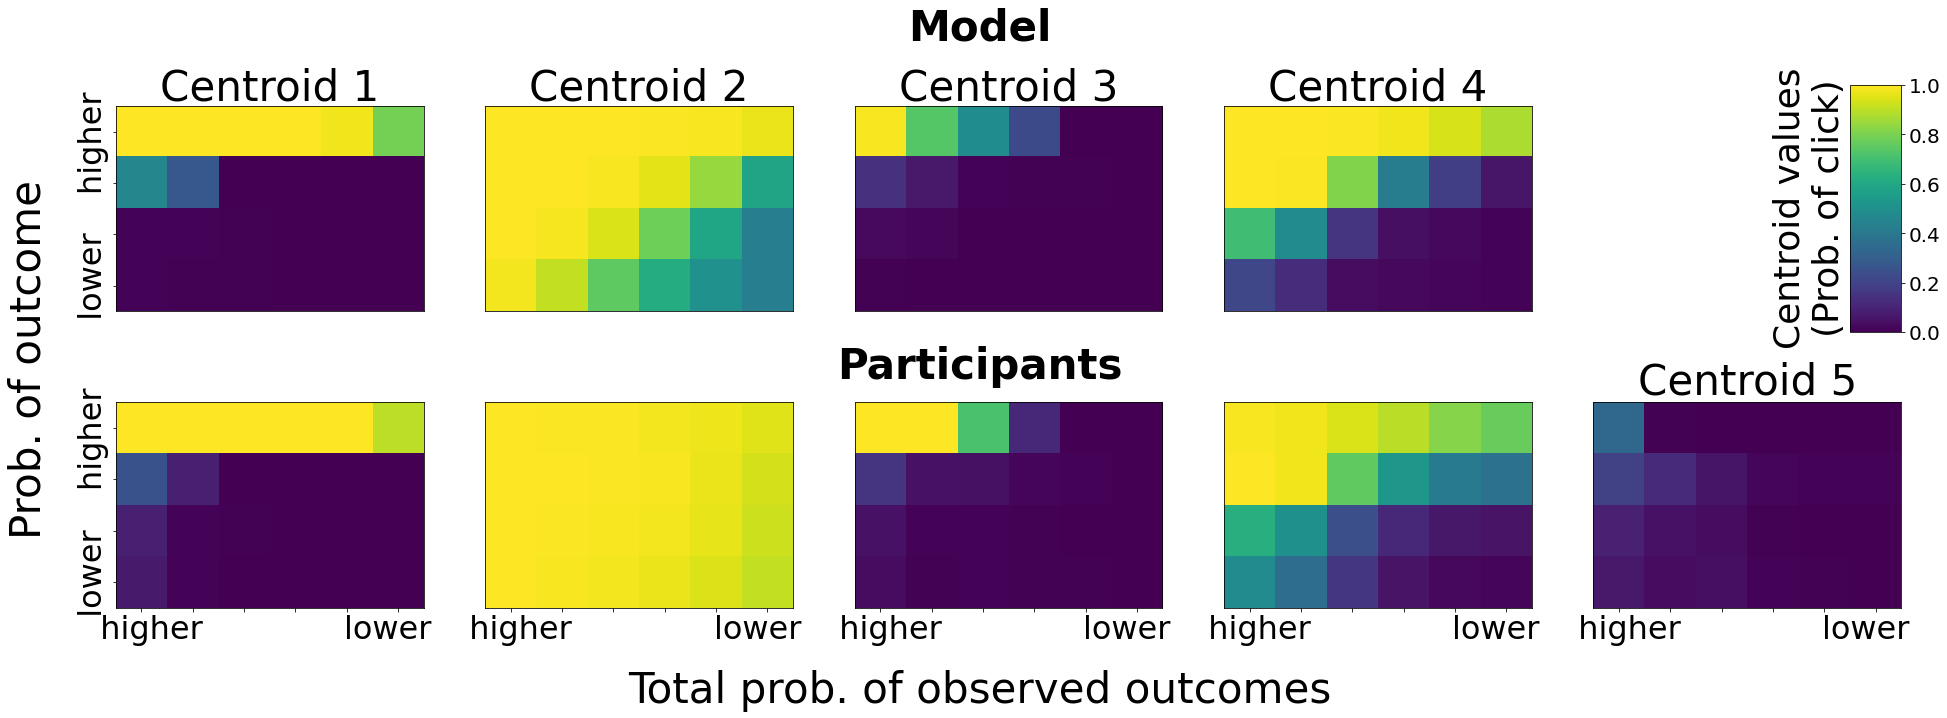

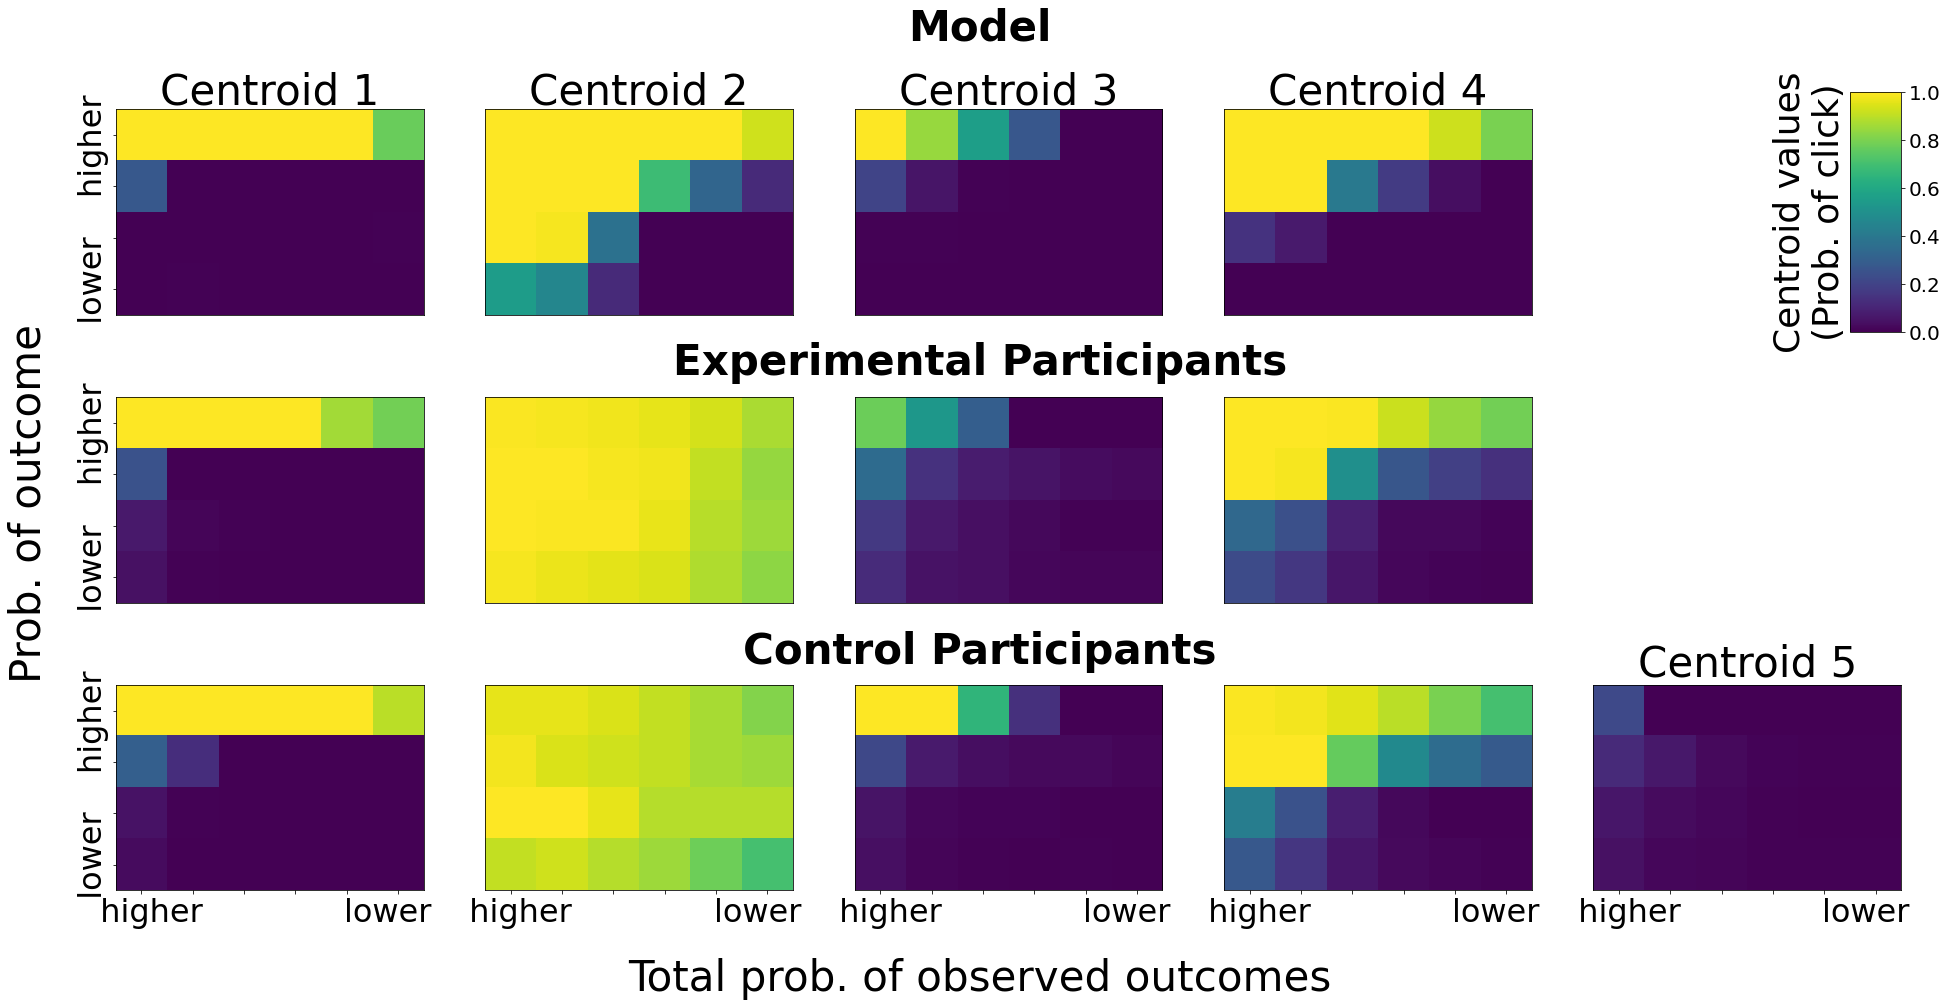

In [1112]:
importlib.reload(mf)
importlib.reload(p_d)
importlib.reload(rs)

save = True
fig_dir = '../figs/exp1/'
model_file = '../data/model/exp1/processed/trials.csv'
human_file = '../data/human/1.0/processed/trials.csv'
mf.centroids(model_file, human_file, fig_dir, save)
# mf.under_performance_pie(human_file, 'exclude', fig_dir, save)
# mf.under_performance_byStrat(human_file, 'exclude', fig_dir, save)

model_file = '../data/model/exp2/processed/trials.csv'
human_file1 = '../data/human/2.3/processed/trials_exp.csv'
human_file2 = '../data/human/2.3/processed/trials_con.csv'
fig_dir = '../figs/exp2/'
save=True
# mf.under_performance_pie(human_file1, human_file2, fig_dir, save)
# mf.under_performance_byStrat(human_file1, human_file2, fig_dir, save)
mf.centroids_exp2(model_file, human_file1, human_file2, fig_dir, save)

/Users/paulkrueger/anaconda3/envs/risky-choice2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/paulkrueger/anaconda3/envs/risky-choice2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


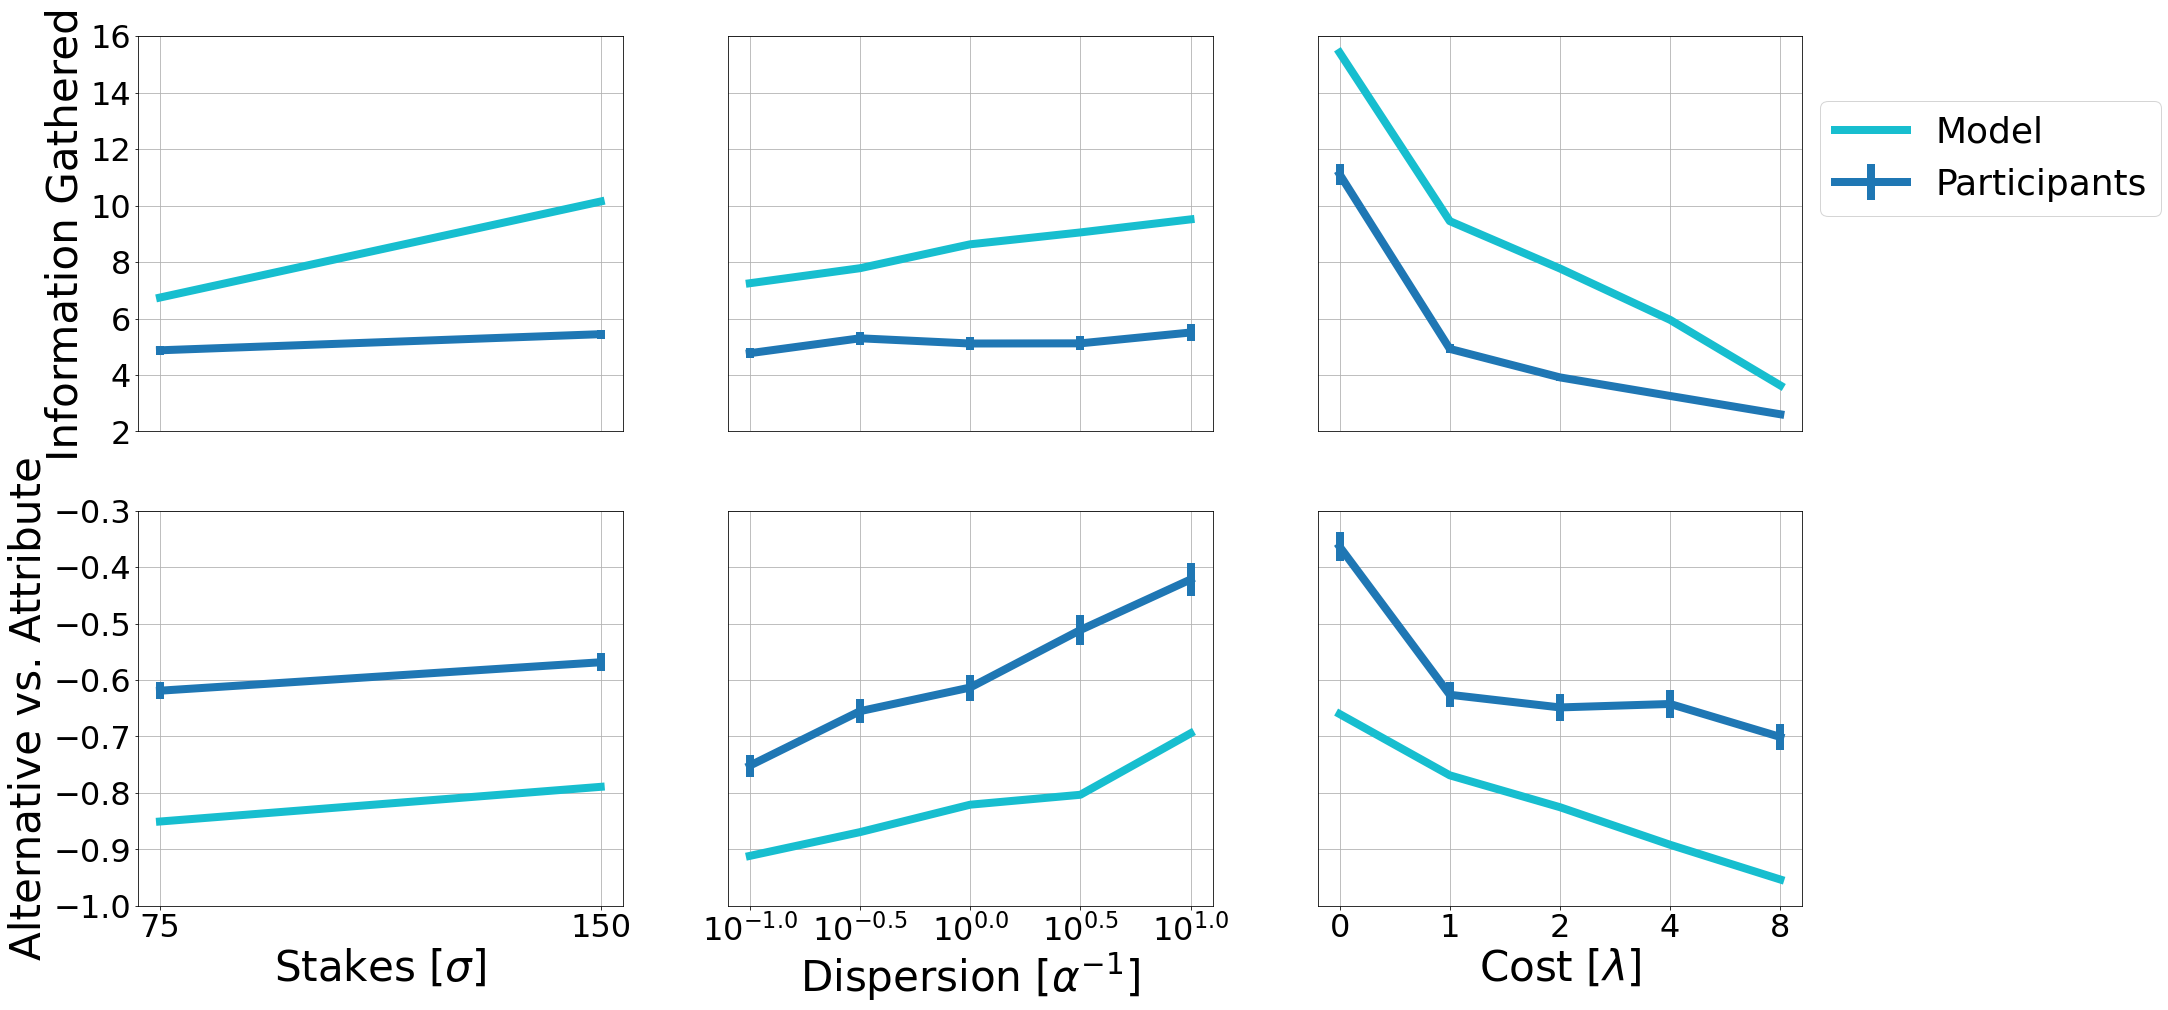

/Users/paulkrueger/anaconda3/envs/risky-choice2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/paulkrueger/anaconda3/envs/risky-choice2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


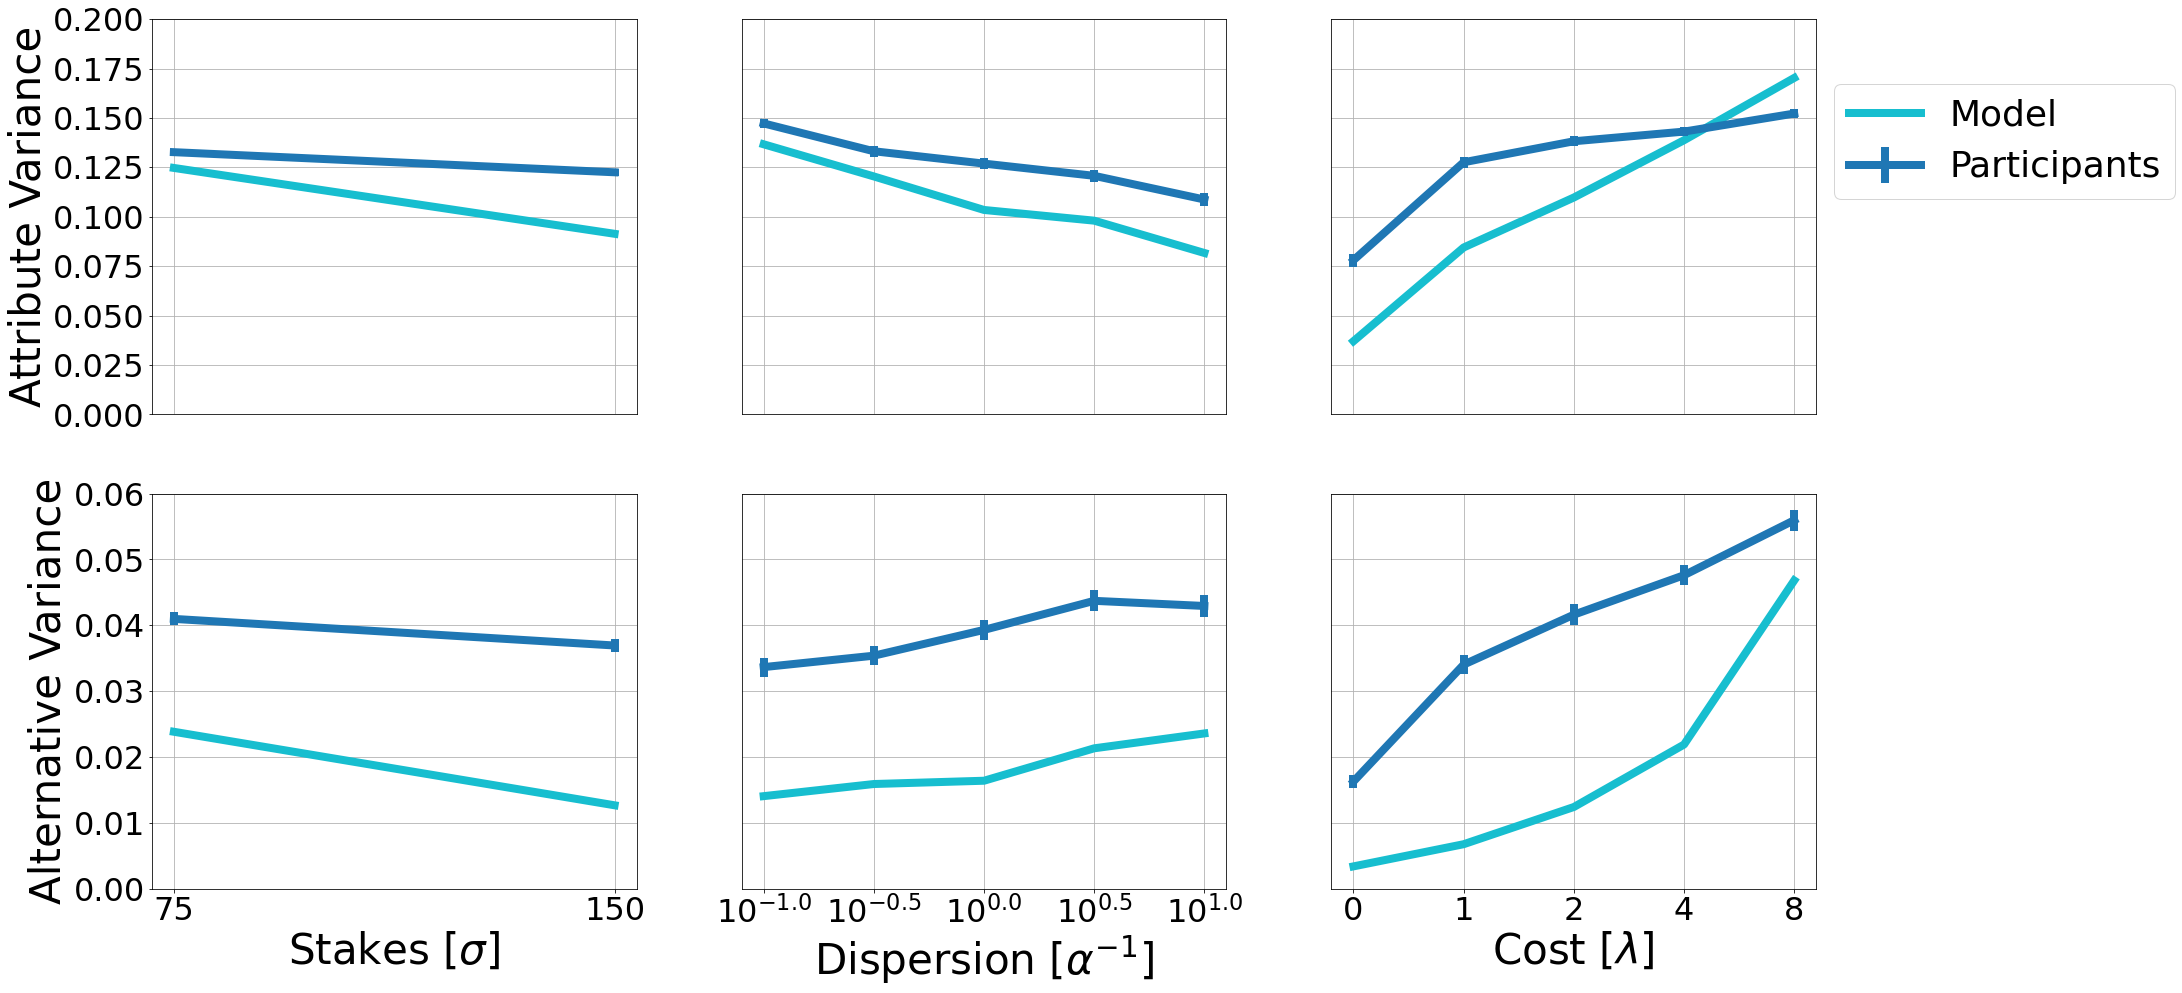

/Users/paulkrueger/anaconda3/envs/risky-choice2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/paulkrueger/anaconda3/envs/risky-choice2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


removed 394 participants for current analysis


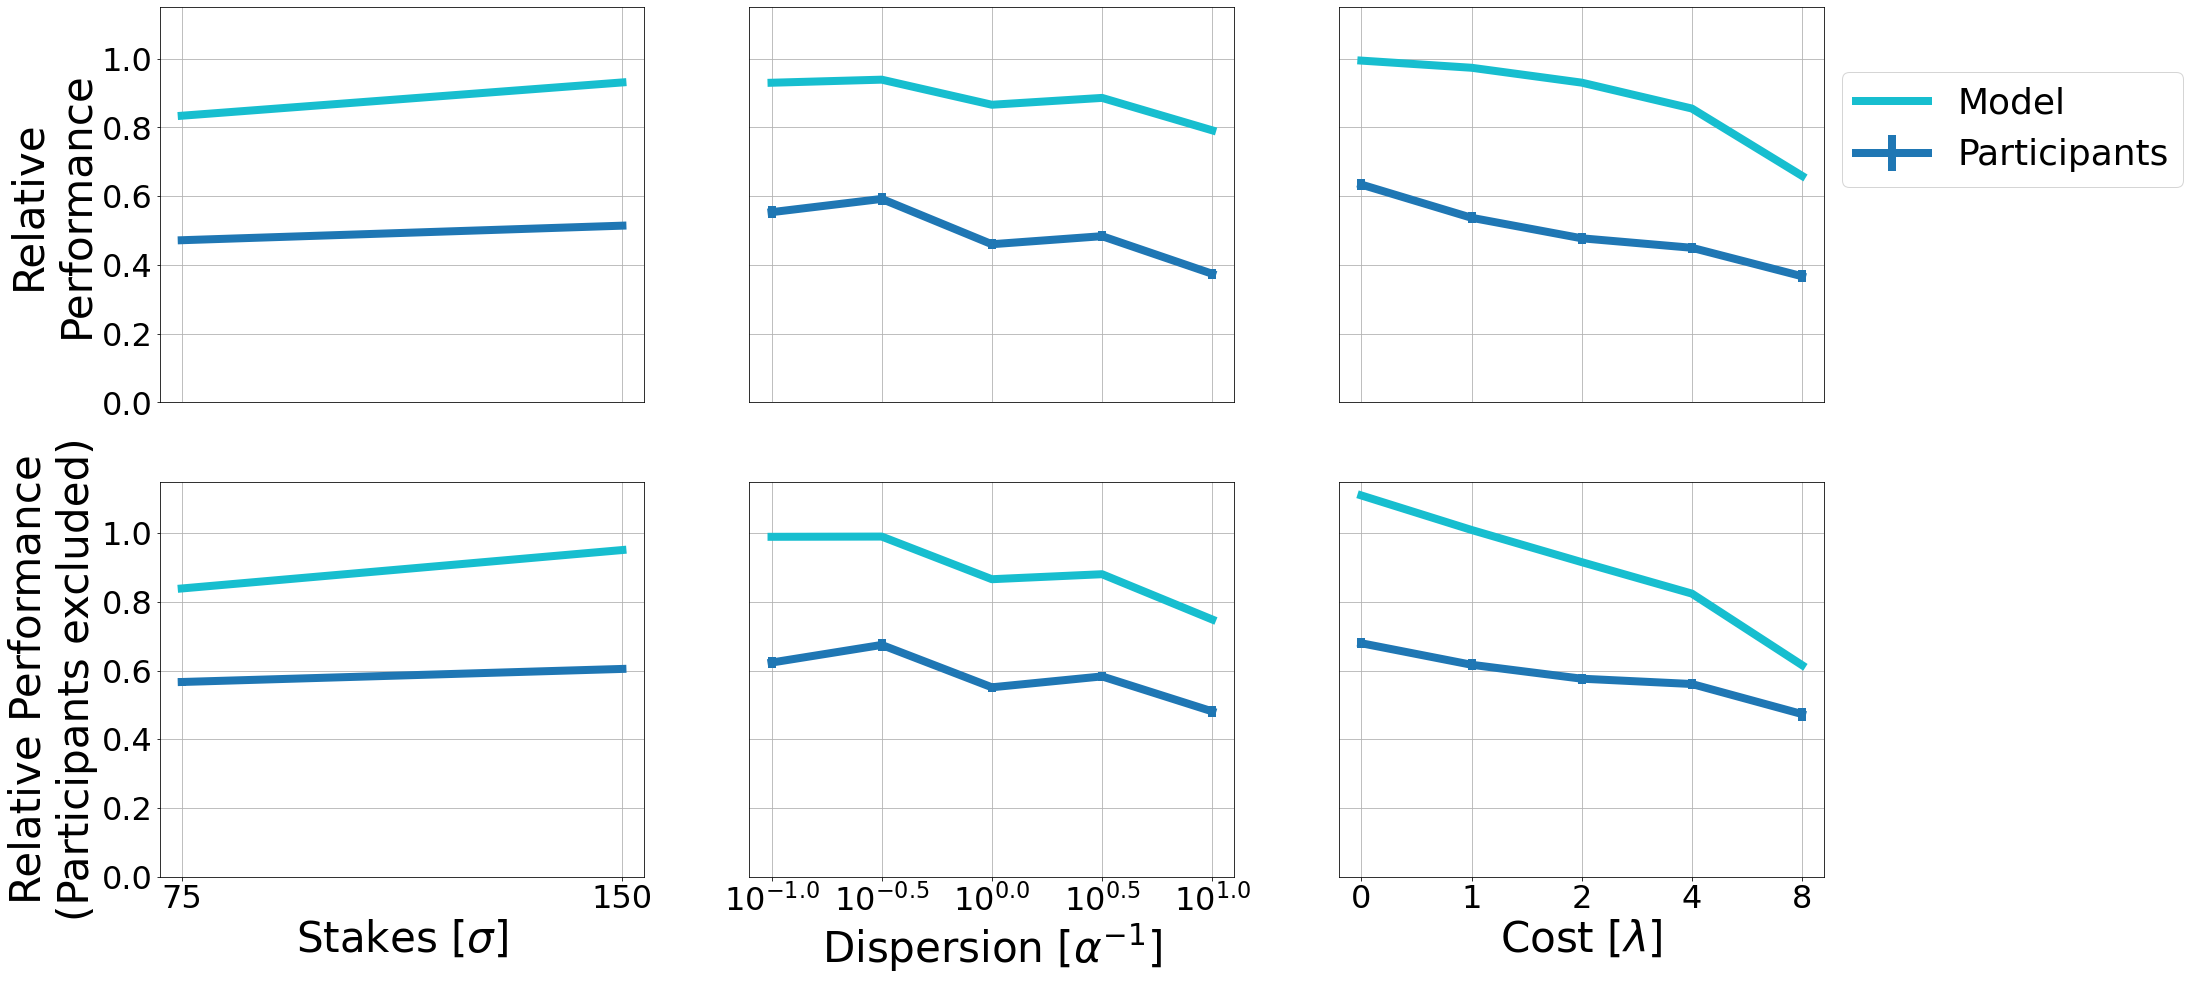

/Users/paulkrueger/anaconda3/envs/risky-choice2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/paulkrueger/anaconda3/envs/risky-choice2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


removed 394 participants for current analysis


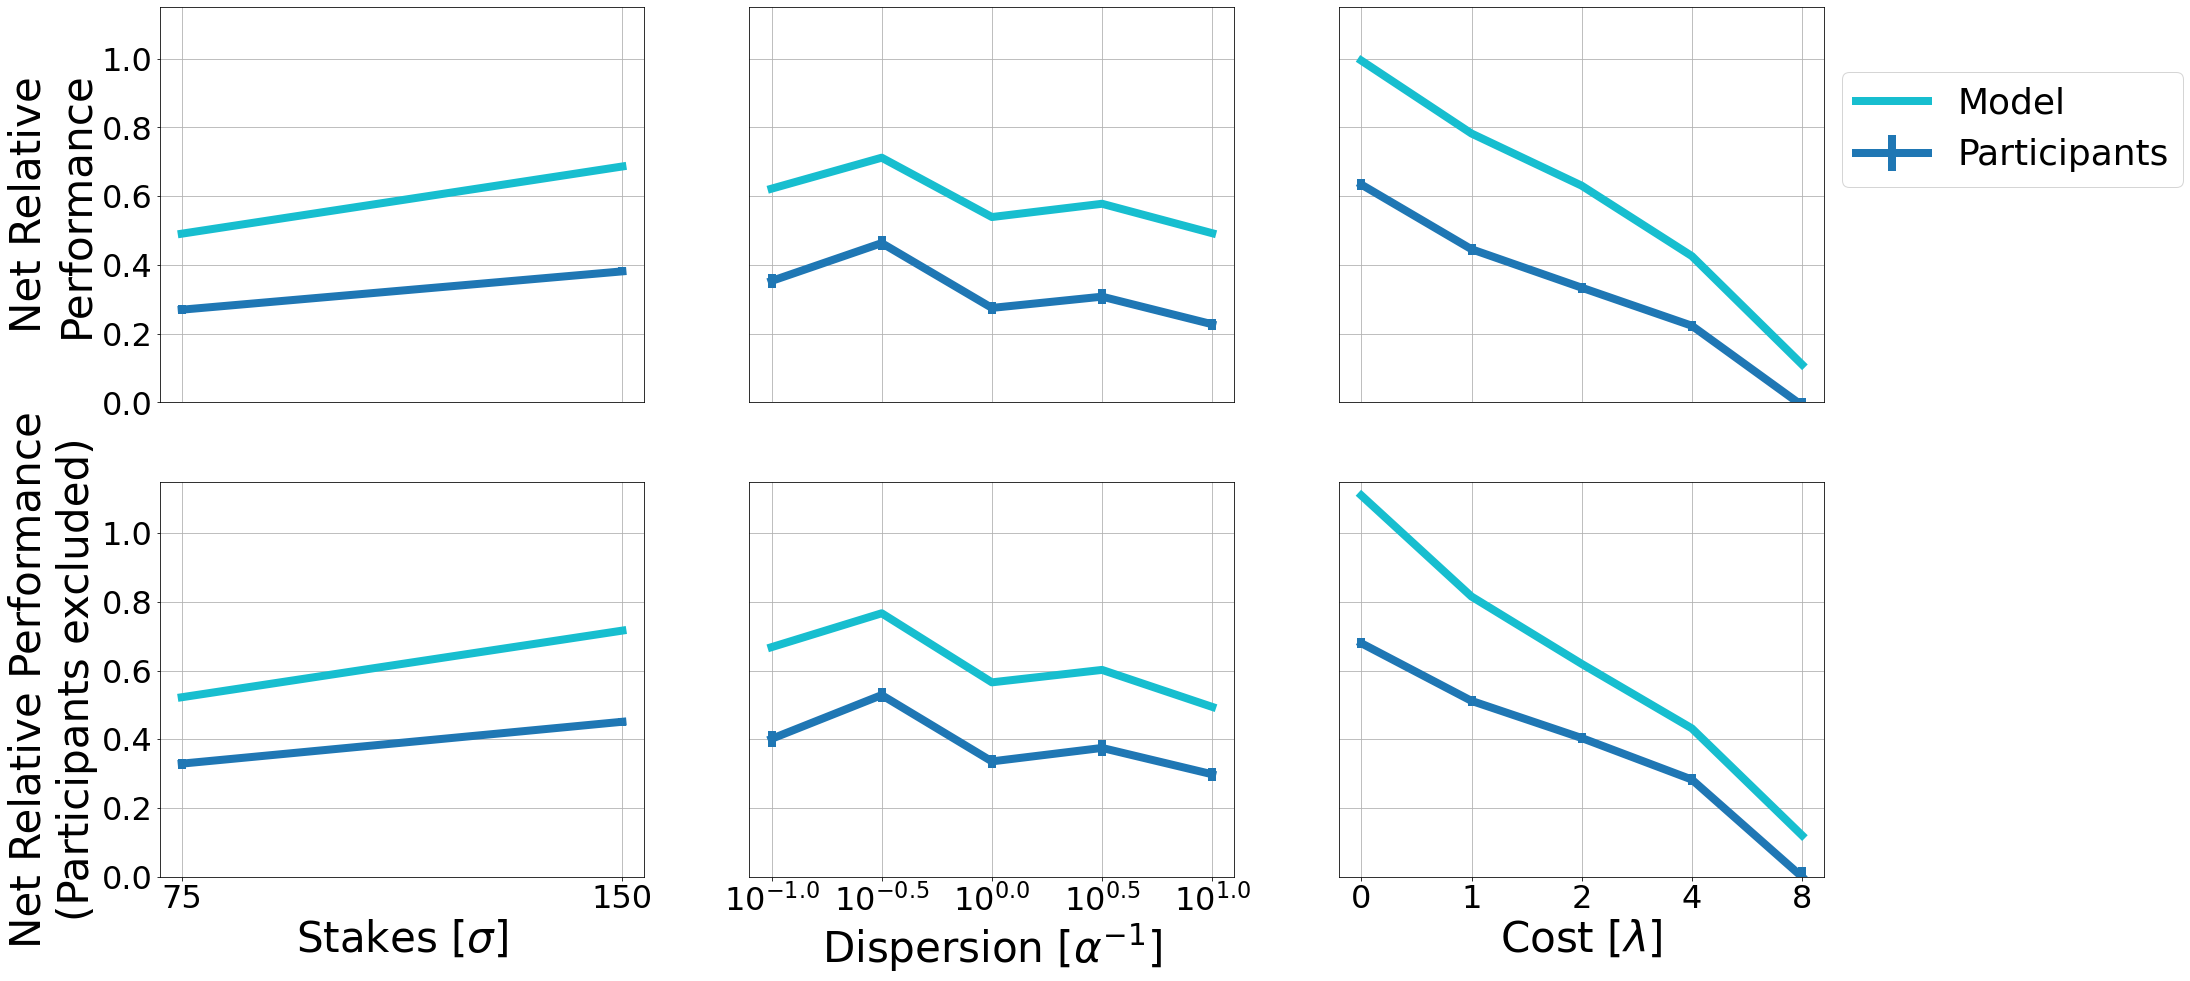

In [1105]:
importlib.reload(mf)

# model_file = '../data/model/exp2/processed/trials.csv'
# human_file1 = '../data/human/2.3/processed/trials_exp.csv'
# human_file2 = '../data/human/2.3/processed/trials_con.csv'
# fig_dir = '../figs/exp2/'
# save = False
# mf.condition_bars_exp2(model_file, human_file1, human_file2, fig_dir, save)
# mf.strategies_exp2(model_file, human_file1, human_file2, fig_dir, save)


model_file = '../data/model/exp1/processed/trials.csv'
human_file = '../data/human/1.0/processed/trials.csv'
fig_dir = '../figs/exp1/'
save = True

mf.condition_lines(model_file, human_file, fig_dir, save)

In [50]:
importlib.reload(p_d)

human_file1 = '../data/human/2.3/processed/trials_exp.csv'
human_file2 = '../data/human/2.3/processed/trials_con.csv'

df1 = pd.read_csv(human_file1)
df2 = pd.read_csv(human_file2)

tmp1 = p_d.remove_nonBestBet_participants(df1, 52)
print(len(tmp1)/len(df1))

tmp2 = p_d.remove_rand_participants(df2)
print(len(tmp2)/len(df2))

0.75
removed 52 participants for current analysis
0.7373737373737373
removed 56 participants for current analysis
0.7281553398058253


In [107]:
type(1)==int
type(0.27184466019417475)==float

True

In [181]:
importlib.reload(p_d)

human_file1 = '../data/human/2.3/processed/trials_exp.csv'
human_file2 = '../data/human/2.3/processed/trials_con.csv'

df1 = pd.read_csv(human_file1)
df2 = pd.read_csv(human_file2)

rand50_pct = 0.27184466019417475

# tmp1 = p_d.remove_rand_participants(df1)
# tmp2 = p_d.remove_rand_participants(df2)

# tmp1 = p_d.remove_rand_participants(df1, rand50_pct)
# tmp2 = p_d.remove_rand_participants(df2, rand50_pct)
# print(tmp1.payoff_gross_bestBet.mean() - tmp1.payoff_gross.mean(), 1-len(tmp1)/len(df1))
# print(tmp2.payoff_gross_bestBet.mean() - tmp2.payoff_gross.mean(), 1-len(tmp2)/len(df2))

# tmp1 = p_d.remove_rand_participants(df1, useBestBet=True)
# tmp2 = p_d.remove_rand_participants(df2, useBestBet=True)
# print(tmp1.payoff_gross_bestBet.mean() - tmp1.payoff_gross.mean(), 1-len(tmp1)/len(df1))
# print(tmp2.payoff_gross_bestBet.mean() - tmp2.payoff_gross.mean(), 1-len(tmp2)/len(df2))

# tmp1 = p_d.remove_rand_participants(df1, n=.26, useBestBet=True)
# tmp2 = p_d.remove_rand_participants(df2, n=.26, useBestBet=True)
# tmp1 = p_d.remove_rand_participants(df1, cutoff=.2, useBestBet=True)
# tmp2 = p_d.remove_rand_participants(df2, cutoff=.2, useBestBet=True)

tmp1 = p_d.remove_rand_participants(df1, n=.25, useBestBet='payoff_gross_relative')
tmp2 = p_d.remove_rand_participants(df2, n=.25, useBestBet='payoff_gross_relative')

# tmp1 = p_d.remove_rand_participants(df1, n=rand50_pct, useBestBet='payoff_net_relative')
# tmp2 = p_d.remove_rand_participants(df2, n=rand50_pct, useBestBet='payoff_net_relative')


removed 50 participants (25.3%) for current analysis (-39.5% cuttoff)
before/after
points lost to bad bets: 3.29/1.47
points lost to non-perfect best: 17.71/10.68
random bets: 6.6/1.4% (4.5/0.0% participants)
bad bets: 17.6/9.2% (12.6/2.0% participants)
removed 53 participants (25.7%) for current analysis (-5.8% cuttoff)
before/after
points lost to bad bets: 1.57/1.27
points lost to non-perfect best: 28.85/19.72
random bets: 28.6/8.1% (27.2/5.2% participants)
bad bets: 29.7/14.5% (26.7/4.6% participants)


In [466]:
importlib.reload(p_d)

model_file = '../data/model/exp2/processed/trials.csv'
human_file1 = '../data/human/2.3/processed/trials_exp.csv'
human_file2 = '../data/human/2.3/processed/trials_con.csv'

df1 = p_d.append_model_payoff_net(model_file, human_file1)
df2 = p_d.append_model_payoff_net(model_file, human_file2)

df1_ = p_d.remove_rand_participants(df1, n=rand50_pct, useBestBet='payoff_net_model')
df2_ = p_d.remove_rand_participants(df2, n=rand50_pct, useBestBet='payoff_net_model')

/Users/paulkrueger/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Int64Index([  1,  17,  30,  33,  35,  60,  79, 109, 110, 119, 127, 132, 171,
            176, 186, 188, 197, 199, 202, 208, 212, 228, 236, 250, 252, 263,
            265, 266, 288, 298, 300, 315, 348, 353, 356, 374, 381, 395, 417,
            425, 482, 485, 510, 516, 526, 529, 563, 567, 569, 580, 587, 589,
            590, 606],
           dtype='int64', name='pid')
Int64Index([  2,   4,   5,  26,  57,  69,  86,  92,  96,  97, 104, 105, 114,
            136, 145, 155, 158, 165, 190, 231, 235, 241, 242, 245, 247, 283,
            308, 313, 318, 324, 327, 347, 375, 382, 387, 396, 406, 412, 413,
            442, 455, 478, 499, 507, 527, 528, 536, 537, 560, 570, 574, 583,
            584, 595, 599, 610],
           dtype='int64', name='pid')


In [530]:
importlib.reload(p_d)

model_file = '../data/model/exp2/processed/trials.csv'
human_file1 = '../data/human/2.3/processed/trials_exp.csv'
human_file2 = '../data/human/2.3/processed/trials_con.csv'


pids_exp='[1  17  30  33  35  47  60  64 119 127 132 171 186 187 197 199 200 202 208 228 250 252 263 265 266 271 299 300 307 329 348 353 356 374 377 380 381 417 438 454 458 469 482 485 510 515 521 526 562 563 569 580 606 611]'
pids_exp=eval(pids_exp.replace(' ',',').replace(',,',','))
pids_con='[4  32  43  69  89  92  97 104 105 114 121 136 138 155 190 231 235 241 242 245 247 269 272 283 297 309 313 321 327 347 375 382 396 406 413 426 446 450 455 459 507 528 533 536 537 552 560 570 574 582 583 584 594 595 609 610]'
pids_con=eval(pids_con.replace(' ',',').replace(',,',','))
df = pd.read_csv(human_file1)
nr1_e = [[None]*2 for _ in range(2)]
for j,a in enumerate(np.flip(df.alpha.sort_values().unique())):
    for i,c in enumerate(df.cost.sort_values().unique()):
        nr1_e[i][j] = sum([p in df[(df.alpha==a) & (df.cost==c)].pid.unique().tolist() for p in pids_exp])
        print(1/a,c,nr1_e[i][j])
df = pd.read_csv(human_file2)
nr1_c = [[None]*2 for _ in range(2)]
for j,a in enumerate(np.flip(df.alpha.sort_values().unique())):
    for i,c in enumerate(df.cost.sort_values().unique()):
        nr1_c[i][j] = sum([p in df[(df.alpha==a) & (df.cost==c)].pid.unique().tolist() for p in pids_con])
        print(1/a,c,nr1_c[i][j])        
        
        
pids_exp=[1,  17,  30,  33,  35,  60,  79, 109, 110, 119, 127, 132, 171, 176, 186, 188, 197, 199, 202, 208, 212, 228, 236, 250, 252, 263, 265, 266, 288, 298, 300, 315, 348, 353, 356, 374, 381, 395, 417, 425, 482, 485, 510, 516, 526, 529, 563, 567, 569, 580, 587, 589, 590, 606]
pids_con=[2,   4,   5,  26,  57,  69,  86,  92,  96,  97, 104, 105, 114, 136, 145, 155, 158, 165, 190, 231, 235, 241, 242, 245, 247, 283, 308, 313, 318, 324, 327, 347, 375, 382, 387, 396, 406, 412, 413, 442, 455, 478, 499, 507, 527, 528, 536, 537, 560, 570, 574, 583, 584, 595, 599, 610]
df = pd.read_csv(human_file1)
nr2_e = [[None]*2 for _ in range(2)]
for j,a in enumerate(np.flip(df.alpha.sort_values().unique())):
    for i,c in enumerate(df.cost.sort_values().unique()):
        nr2_e[i][j] = sum([p in df[(df.alpha==a) & (df.cost==c)].pid.unique().tolist() for p in pids_exp])
        print(1/a,c,nr2_e[i][j])
df = pd.read_csv(human_file2)
nr2_c = [[None]*2 for _ in range(2)]
for j,a in enumerate(np.flip(df.alpha.sort_values().unique())):
    for i,c in enumerate(df.cost.sort_values().unique()):
        nr2_c[i][j] = sum([p in df[(df.alpha==a) & (df.cost==c)].pid.unique().tolist() for p in pids_con])
        print(1/a,c,nr2_c[i][j])    


0.3125 1 16
0.3125 4 24
3.3333333333333335 1 6
3.3333333333333335 4 8
0.3125 1 17
0.3125 4 21
3.3333333333333335 1 8
3.3333333333333335 4 10
0.3125 1 24
0.3125 4 14
3.3333333333333335 1 8
3.3333333333333335 4 8
0.3125 1 23
0.3125 4 2
3.3333333333333335 1 18
3.3333333333333335 4 13


In [540]:
print(nr1_e)
print(nr1_c)
print(np.array(nr1_e)+np.array(nr1_c))
print(nr2_e)
print(nr2_c)
print(np.array(nr2_e)+np.array(nr2_c))

[[16, 6], [24, 8]]
[[17, 8], [21, 10]]
[[33 14]
 [45 18]]
[[24, 8], [14, 8]]
[[23, 18], [2, 13]]
[[47 26]
 [16 21]]


array([[47, 26],
       [16, 21]])

In [514]:

pids_exp

[1,
 17,
 30,
 33,
 35,
 47,
 60,
 64,
 119,
 127,
 132,
 171,
 186,
 187,
 197,
 199,
 200,
 202,
 208,
 228,
 250,
 252,
 263,
 265,
 266,
 271,
 299,
 300,
 307,
 329,
 348,
 353,
 356,
 374,
 377,
 380,
 381,
 417,
 438,
 454,
 458,
 469,
 482,
 485,
 510,
 515,
 521,
 526,
 562,
 563,
 569,
 580,
 606,
 611]

/Users/paulkrueger/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/paulkrueger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


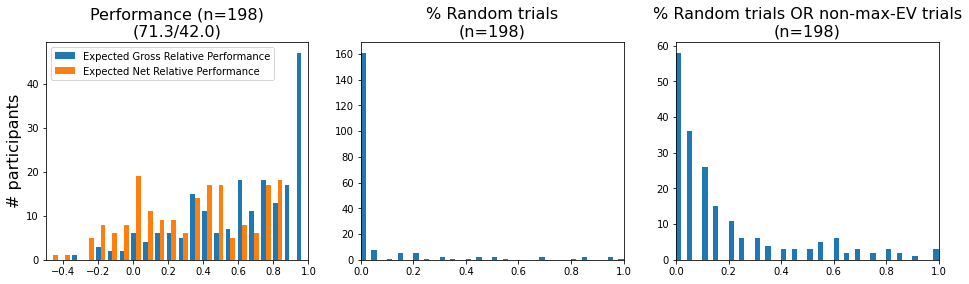

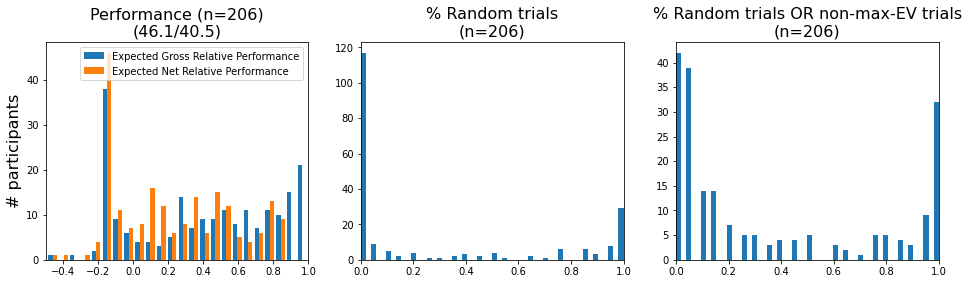

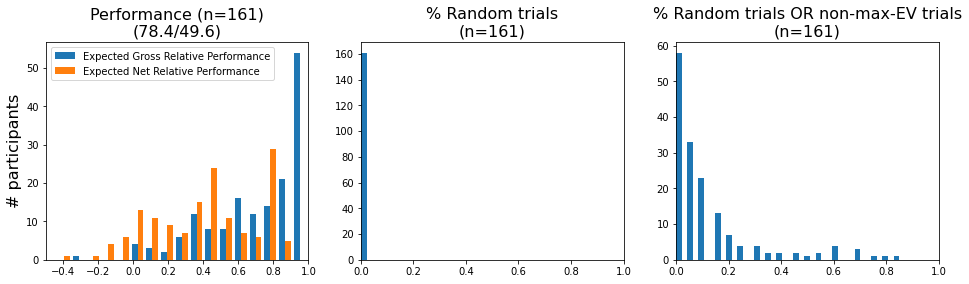

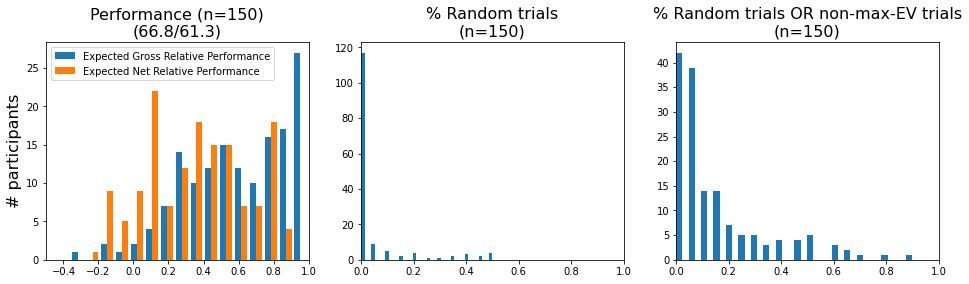

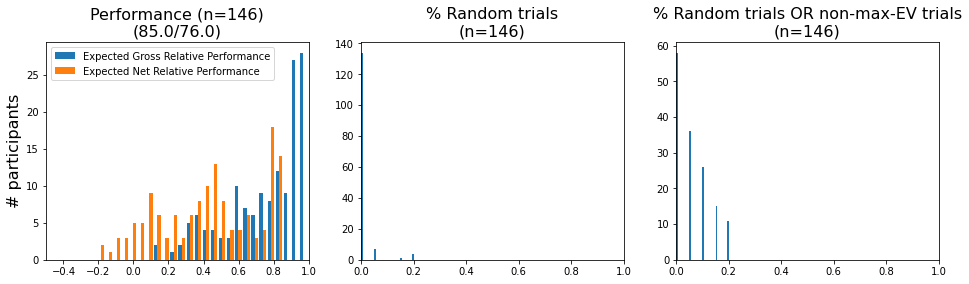

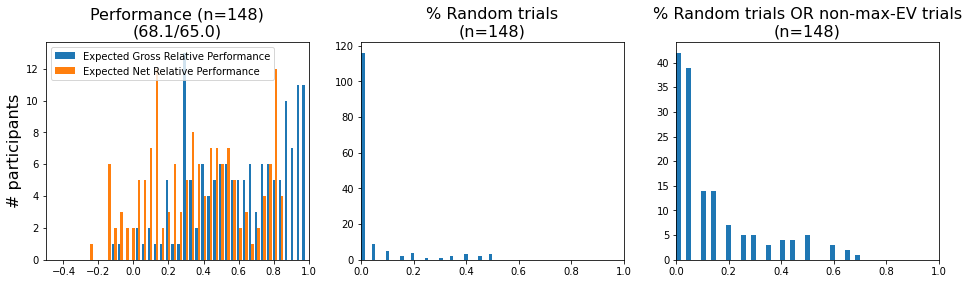

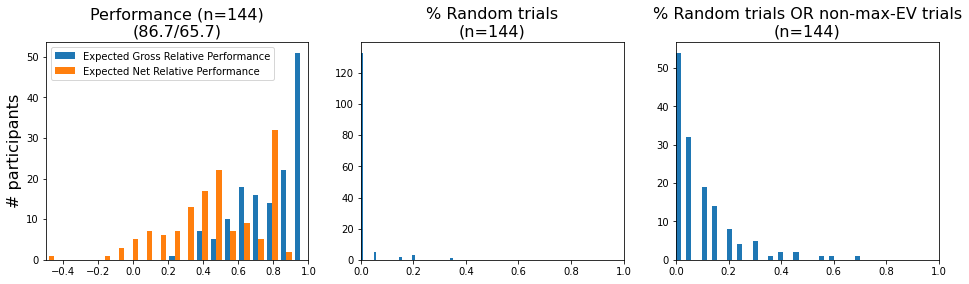

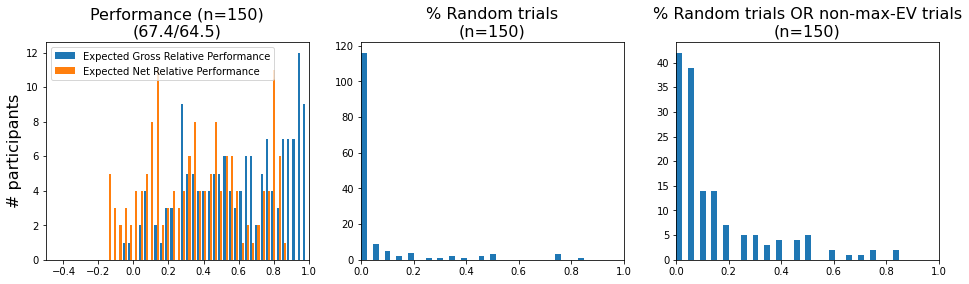

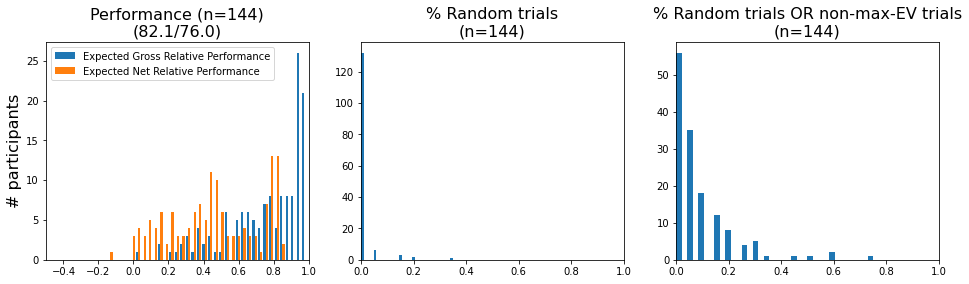

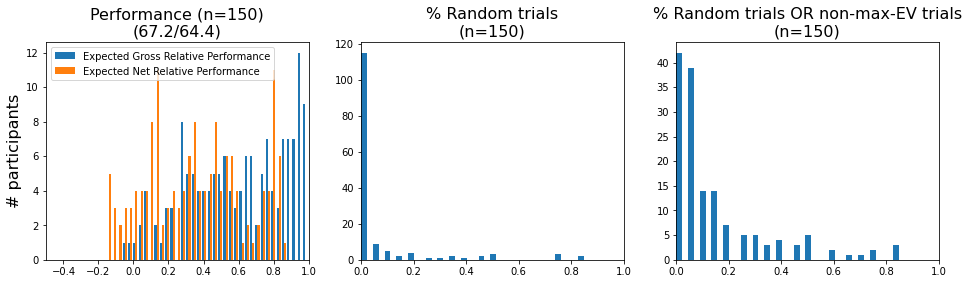

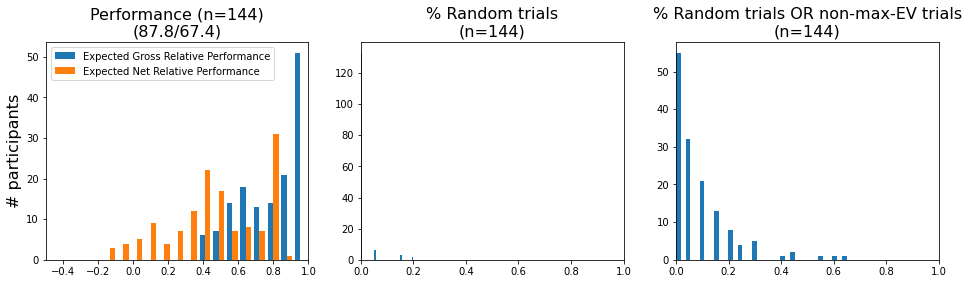

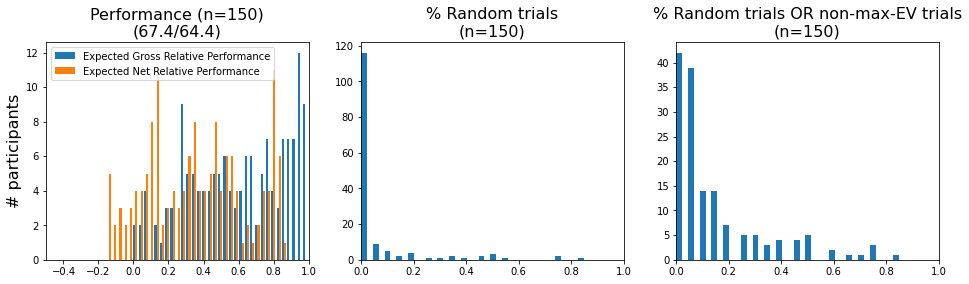

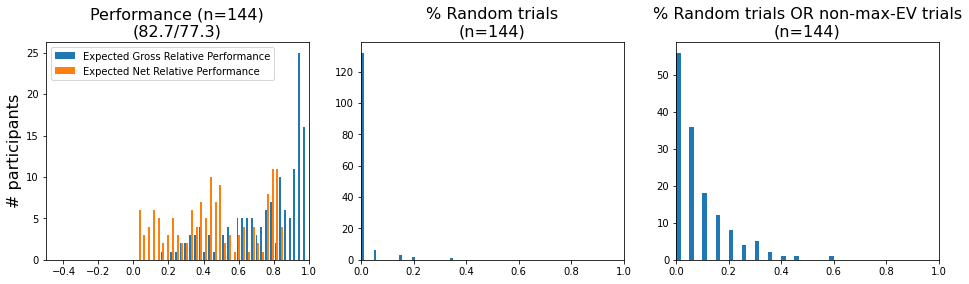

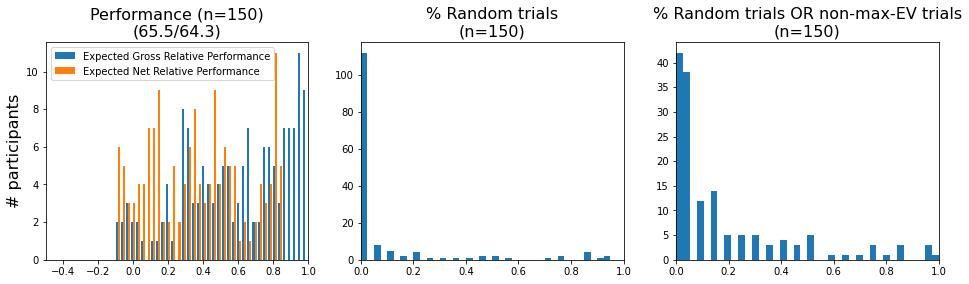

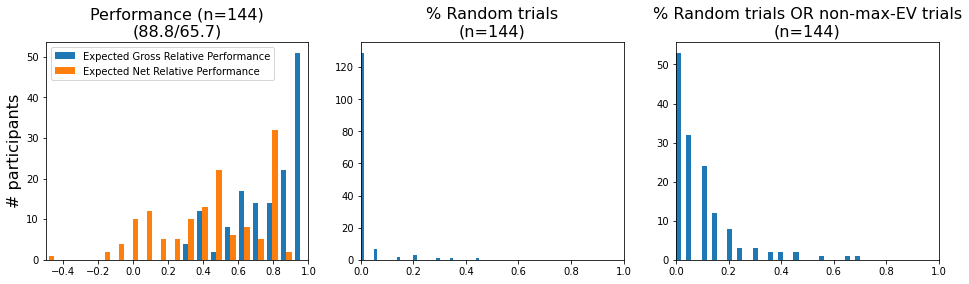

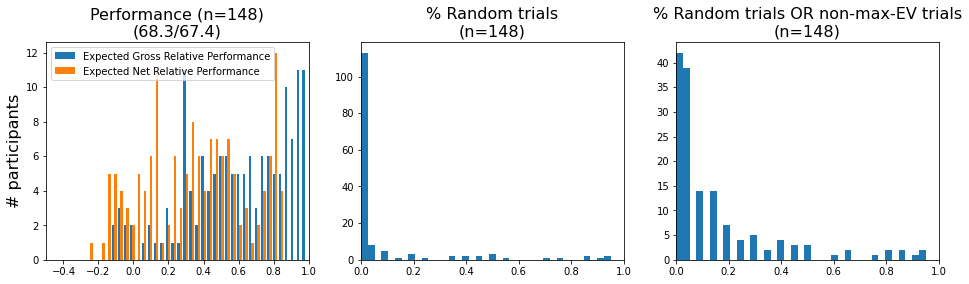

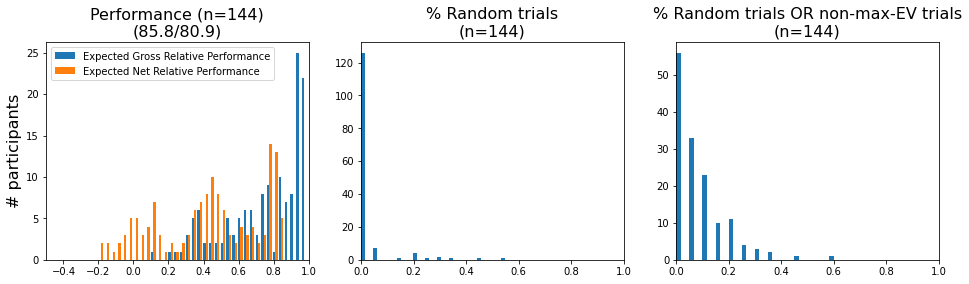

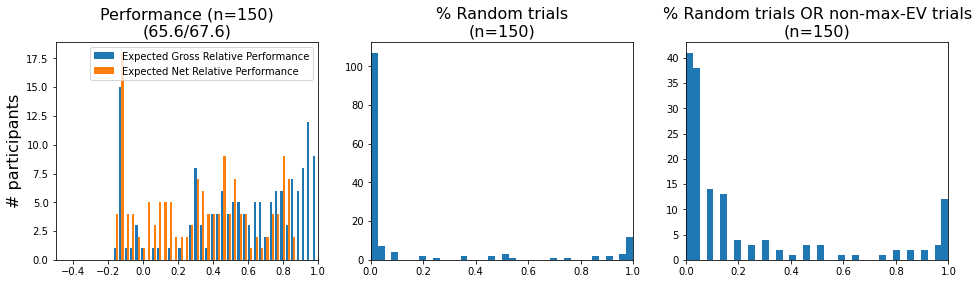

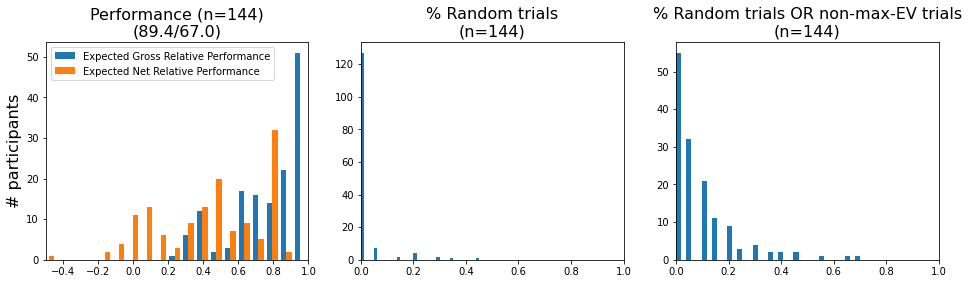

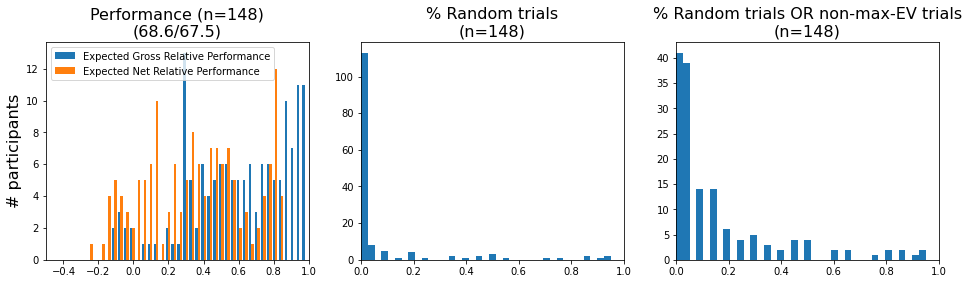

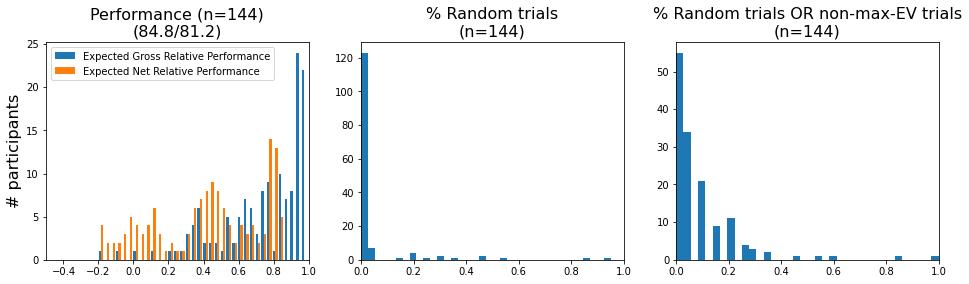

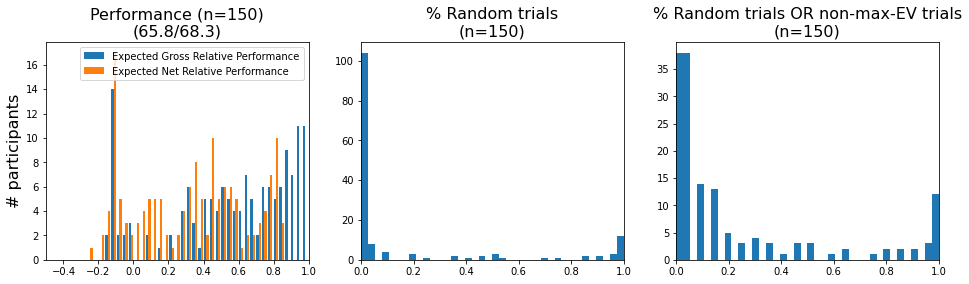

In [455]:
importlib.reload(p_d)

model_file = '../data/model/exp2/processed/trials.csv'
human_file1 = '../data/human/2.3/processed/trials_exp.csv'
human_file2 = '../data/human/2.3/processed/trials_con.csv'

rand50_pct = 0.27184466019417475 # % participants in experimental group with > 50% random trials
criteria = True

df1 = p_d.append_model_payoff_net(model_file, human_file1)
df2 = p_d.append_model_payoff_net(model_file, human_file2)
for criteria in ['skip',None,True,'payoff_gross','payoff_net','payoff_gross_relative','payoff_net_relative','payoff_gross_model','payoff_net_model','payoff_gross_relative_model','payoff_net_relative_model']:
    for i, df in enumerate([df1, df2]):

#         bins = int(round(len(x1)/4))
#         plt.figure(figsize=(16,8))
    #     plt.subplots_adjust(hspace=0.4)
    #     plt.subplot(2,3,1)
    #     plt.hist(np.vstack([x1['payoff_gross_relative'],x1['payoff_net_relative']]).T, bins); plt.xlim([-2.5, 1])
    #     plt.legend(['Expected Gross Relative Performance', 'Expected Net Relative Performance'])
    #     plt.ylabel('# participants', fontsize=16)
    #     plt.title(f'Performance\n(n={len(x1):.0f})', fontsize=16)
    #     plt.subplot(2,3,2)
    #     plt.hist(x1['Rand'], bins); plt.xlim([0, 1])
    #     plt.title(f'% Random trials\n(n={len(x1):.0f})', fontsize=16)
    #     plt.subplot(2,3,3)
    #     plt.hist(x1['bad_choice'], bins); plt.xlim([0, 1])
    #     plt.title(f'% Random trials OR non-max-EV trials\n(n={len(x1):.0f})', fontsize=16)
        plt.figure(figsize=(16,4))
        if criteria=='skip':
            x1 = df
        else:
            x1 = p_d.remove_rand_participants(df, n=rand50_pct, useBestBet=criteria)
        x1 = x1.groupby('pid').mean()
        bins = int(round(len(x1)/4))
        plt.subplot(1,3,1)
        plt.hist(np.vstack([x1['payoff_gross_relative'],x1['payoff_net_relative']]).T, bins); plt.xlim([-.5, 1])
        plt.legend(['Expected Gross Relative Performance', 'Expected Net Relative Performance'])
        plt.ylabel('# participants', fontsize=16)
        plt.title(f'Performance (n={len(x1):.0f})\n({100*np.mean(x1.payoff_gross_relative)/np.mean(x1.payoff_gross_relative_model):.1f}/{100*np.mean(x1.payoff_net_relative)/np.mean(x1.payoff_net_relative_model):.1f})', fontsize=16)
        plt.subplot(1,3,2)
        plt.hist(x1['Rand'], bins); plt.xlim([0, 1])
        plt.title(f'% Random trials\n(n={len(x1):.0f})', fontsize=16)
        plt.subplot(1,3,3)
        plt.hist(x1['bad_choice'], bins); plt.xlim([0, 1])
        plt.title(f'% Random trials OR non-max-EV trials\n(n={len(x1):.0f})', fontsize=16)

        ttl_str = 'exp_' if i==0 else 'con_'
        plt.savefig('/Users/paulkrueger/Desktop/'+ttl_str+str(criteria)+'.png', facecolor='w')
    #     plt.show()



/Users/paulkrueger/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/paulkrueger/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


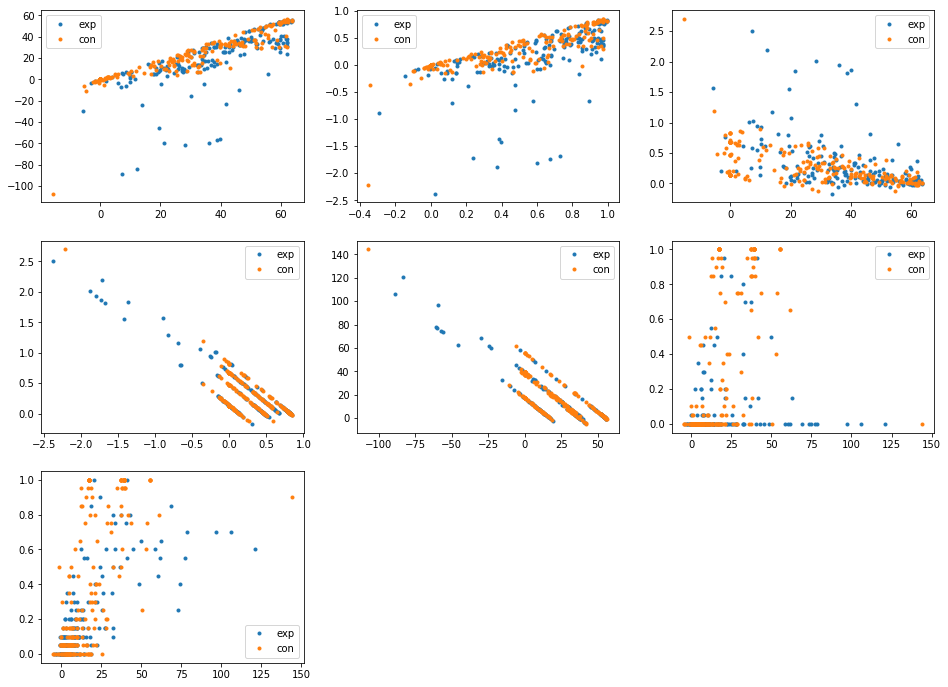

In [413]:
importlib.reload(p_d)

model_file = '../data/model/exp2/processed/trials.csv'
human_file1 = '../data/human/2.3/processed/trials_exp.csv'
human_file2 = '../data/human/2.3/processed/trials_con.csv'

criteria = 'payoff_net_model'

df = p_d.append_model_payoff_net(model_file, human_file1)
# df = p_d.remove_rand_participants(df, n=rand50_pct, useBestBet=criteria)
df['badTrial'] = (df['choice']!=df['best_choice']) | (df['Rand'])
x1 = df.groupby('pid').mean()

df = p_d.append_model_payoff_net(model_file, human_file2)
# df = p_d.remove_rand_participants(df, n=rand50_pct, useBestBet=criteria)
df['badTrial'] = (df['choice']!=df['best_choice']) | (df['Rand'])
x2 = df.groupby('pid').mean()
    
plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
plt.plot(x1['payoff_gross'], x1['payoff_net'], '.')
plt.plot(x2['payoff_gross'], x2['payoff_net'], '.')
plt.legend(['exp','con'])
plt.subplot(3,3,2)
plt.plot(x1['payoff_gross_relative'], x1['payoff_net_relative'], '.')
plt.plot(x2['payoff_gross_relative'], x2['payoff_net_relative'], '.')
plt.legend(['exp','con'])
plt.subplot(3,3,3)
plt.plot(x1['payoff_gross'], x1['payoff_net_relative_model'], '.')
plt.plot(x2['payoff_gross'], x2['payoff_net_relative_model'], '.')
plt.legend(['exp','con'])

plt.subplot(3,3,4)
plt.plot(x1['payoff_net_relative'], x1['payoff_net_relative_model'], '.')
plt.plot(x2['payoff_net_relative'], x2['payoff_net_relative_model'], '.')
plt.legend(['exp','con'])

plt.subplot(3,3,5)
plt.plot(x1['payoff_net'], x1['payoff_net_model'], '.')
plt.plot(x2['payoff_net'], x2['payoff_net_model'], '.')
plt.legend(['exp','con'])

plt.subplot(3,3,6)
plt.plot(x1['payoff_net_model'], x1['Rand'], '.')
plt.plot(x2['payoff_net_model'], x2['Rand'], '.')
plt.legend(['exp','con'])

plt.subplot(3,3,7)
plt.plot(x1['payoff_net_model'], x1['badTrial'], '.')
plt.plot(x2['payoff_net_model'], x2['badTrial'], '.')
plt.legend(['exp','con'])

In [441]:
importlib.reload(p_d)

model_file = '../data/model/exp2/processed/trials.csv'
human_file1 = '../data/human/2.3/processed/trials_exp.csv'
human_file2 = '../data/human/2.3/processed/trials_con.csv'

df0 = pd.read_csv(model_file)
df1 = p_d.append_model_payoff_net(model_file, human_file1)
df2 = p_d.append_model_payoff_net(model_file, human_file2)
p1 = np.mean(df1.payoff_net_relative / df1.payoff_net_relative_model)
p2 = np.mean(df2.payoff_net_relative / df2.payoff_net_relative_model)
# p1 = df1.payoff_net_relative.mean() / df1.payoff_net_relative_model.mean()
# p2 = df2.payoff_net_relative.mean() / df2.payoff_net_relative_model.mean()

i1 = np.mean((df1.payoff_net_relative_bestBet - df1.payoff_net_relative) / df1.payoff_net_relative_model)
i2 = np.mean((df2.payoff_net_relative_bestBet - df2.payoff_net_relative) / df2.payoff_net_relative_model)
# i1 = (df1.payoff_net_relative_bestBet.mean() - df1.payoff_net_relative.mean()) / df1.payoff_net_relative_model.mean()
# i2 = (df2.payoff_net_relative_bestBet.mean() - df2.payoff_net_relative.mean()) / df2.payoff_net_relative_model.mean()

c1 = df1.nr_clicks.mean()
c2 = df2.nr_clicks.mean()
print(f'perf:{100*p1:.1f}, info:{100*i1:.1f}, clicks:{c1:.1f}')
print(f'perf:{100*p2:.1f}, info:{100*i2:.1f}, clicks:{c2:.1f}')

for criteria in [None,True,'payoff_gross','payoff_net','payoff_gross_relative','payoff_net_relative','payoff_gross_model','payoff_net_model','payoff_gross_relative_model','payoff_net_relative_model']:
    d1 = p_d.remove_rand_participants(df1, n=rand50_pct, useBestBet=criteria)
    d2 = p_d.remove_rand_participants(df2, n=rand50_pct, useBestBet=criteria)
    print(criteria)
    p1 = np.mean(d1.payoff_net_relative / d1.payoff_net_relative_model)
    p2 = np.mean(d2.payoff_net_relative / d2.payoff_net_relative_model)
#     p1 = d1.payoff_net_relative.mean() / d1.payoff_net_relative_model.mean()
#     p2 = d2.payoff_net_relative.mean() / d2.payoff_net_relative_model.mean()
    i1 = np.mean((d1.payoff_net_relative_bestBet - d1.payoff_net_relative) / d1.payoff_net_relative_model)
    i2 = np.mean((d2.payoff_net_relative_bestBet - d2.payoff_net_relative) / d2.payoff_net_relative_model)
#     i1 = (d1.payoff_net_relative_bestBet.mean() - d1.payoff_net_relative.mean()) / d1.payoff_net_relative_model.mean()
#     i2 = (d2.payoff_net_relative_bestBet.mean() - d2.payoff_net_relative.mean()) / d2.payoff_net_relative_model.mean()
    c1 = d1.nr_clicks.mean()
    c2 = d2.nr_clicks.mean()
    print(f'perf:{100*p1:.1f}, info:{100*i1:.1f}, clicks:{c1:.1f}')
    print(f'perf:{100*p2:.1f}, info:{100*i2:.1f}, clicks:{c2:.1f}')
    
    

/Users/paulkrueger/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


perf:129.3, info:9.5, clicks:7.3
perf:108.2, info:-0.1, clicks:3.8
None
perf:119.2, info:7.8, clicks:8.0
perf:127.1, info:-0.3, clicks:5.1
True
perf:102.7, info:1.3, clicks:6.5
perf:130.9, info:-1.9, clicks:5.0
payoff_gross
perf:120.0, info:5.4, clicks:7.8
perf:125.1, info:-0.7, clicks:4.9
payoff_net
perf:85.9, info:3.3, clicks:6.8
perf:125.0, info:-1.0, clicks:4.9
payoff_gross_relative
perf:115.6, info:5.3, clicks:7.7
perf:123.8, info:-3.3, clicks:4.9
payoff_net_relative
perf:82.0, info:6.1, clicks:6.7
perf:111.5, info:-3.5, clicks:4.8
payoff_gross_model
perf:146.1, info:0.3, clicks:7.6
perf:138.1, info:-4.8, clicks:4.8
payoff_net_model
perf:114.1, info:0.7, clicks:6.2
perf:148.1, info:-5.1, clicks:4.5
payoff_gross_relative_model
perf:147.3, info:3.1, clicks:7.4
perf:138.4, info:-4.6, clicks:4.9
payoff_net_relative_model
perf:120.4, info:3.3, clicks:6.0
perf:154.0, info:-5.6, clicks:4.4


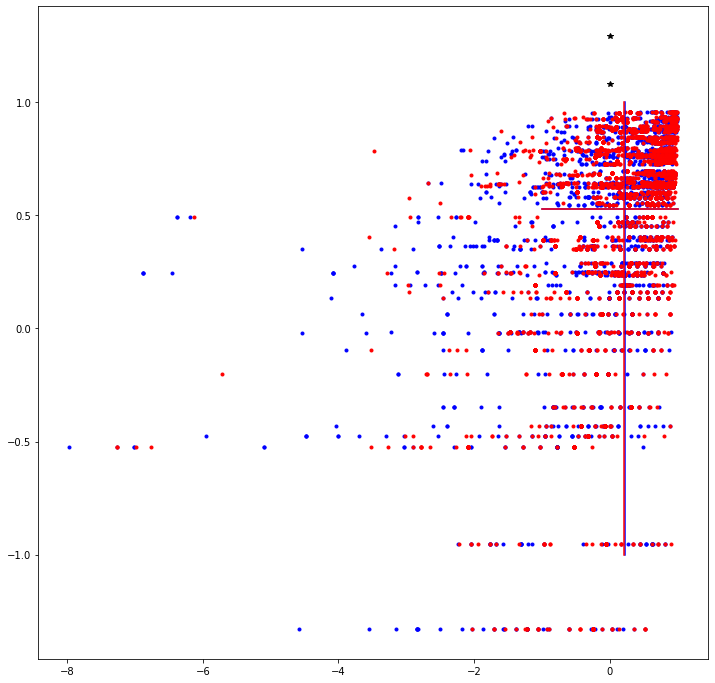

0.4199534972542001

In [445]:
# plt.plot(df1.payoff_net_relative, df1.payoff_net_relative_model, '.')
# plt.show()

plt.figure(figsize=(12,12))
plt.plot(df1.payoff_net_relative, df1.payoff_net_relative_model, '.b')
plt.plot(df2.payoff_net_relative, df2.payoff_net_relative_model, '.r')
plt.plot([df1.payoff_net_relative.mean(), df1.payoff_net_relative.mean()], [-1,1], 'b')
plt.plot([df2.payoff_net_relative.mean(), df2.payoff_net_relative.mean()], [-1,1], 'r')
plt.plot([-1,1], [df1.payoff_net_relative_model.mean(), df1.payoff_net_relative_model.mean()], 'b')
plt.plot([-1,1], [df2.payoff_net_relative_model.mean(), df2.payoff_net_relative_model.mean()], 'r')
p1 = np.mean(df1.payoff_net_relative / df1.payoff_net_relative_model)
p2 = np.mean(df2.payoff_net_relative / df2.payoff_net_relative_model)
plt.plot(p1, '*k')
plt.plot(p2, '*k')
plt.show()
df1.payoff_net_relative.mean() / df1.payoff_net_relative_model.mean()


# p1 = df1.payoff_net_relative.mean() / df1.payoff_net_relative_model.mean()
# p2 = df2.payoff_net_relative.mean() / df2.payoff_net_relative_model.mean()

/Users/paulkrueger/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


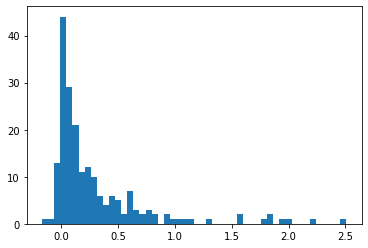

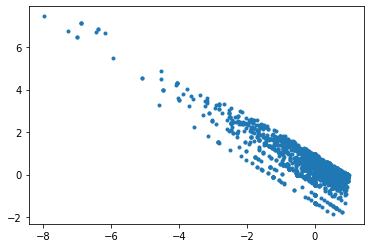

0.08585858585858586

In [419]:
model_file = '../data/model/exp2/processed/trials.csv'
human_file1 = '../data/human/2.3/processed/trials_exp.csv'
human_file2 = '../data/human/2.3/processed/trials_con.csv'

df = p_d.append_model_payoff_net(model_file, human_file1)
x = df.groupby('pid').mean()['payoff_net_relative_model']

plt.hist(x, 50);plt.show()
plt.plot(df['payoff_net_relative'], df['payoff_net_relative_model'], '.');plt.show()
np.mean(x<0)

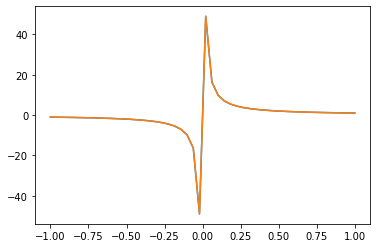

In [497]:
x = np.linspace(-1,1,50)
plt.plot(x,1/x)
plt.plot(x,1/x)

In [488]:
importlib.reload(p_d)
importlib.reload(mf)
importlib.reload(rs)

model_file = '../data/model/exp2/processed/trials.csv'
human_file1 = '../data/human/2.3/processed/trials_exp.csv'
human_file2 = '../data/human/2.3/processed/trials_con.csv'
fig_dir = '../figs/exp2/'
stats_dir = '../stats/exp2/'

p_d.run_process_data(which_experiment='both', process_human=True, run_kmeans=True, process_model=False)

# df1 = pd.read_csv(human_file1)
# df2 = pd.read_csv(human_file2)

# print(np.mean(df1.payoff_gross - df1.payoff_gross_bestBet))
# df = p_d.remove_nonBestBet_participants(df1, 52)
# print(np.mean(df.payoff_gross - df.payoff_gross_bestBet))


# rs.exp2_behavior(human_file1, human_file2, stats_dir, print_summary=True)


# save = False
# mf.under_performance_pie(human_file1, human_file2, fig_dir, save)
# mf.under_performance_byStrat(human_file1, human_file2, fig_dir, save)



AssertionError: 